# Summary
- Spearmans of neuron rankings improve with higher layers
- Lower layers of xlnet large actually are similar to higher layers of bert large. 
- Final four layers of bert large are quite different from the rest. Weird, because architecturally nothing has changed.

In [47]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os.path import basename, dirname
import torch
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

from ipywidgets import FloatSlider, interactive
import sys
sys.path.append('..')
from var import fname2mname, network2pair, network_sort_key

In [48]:
method_l = [
    "maxcorr", 
    "mincorr", 
    "maxlinreg", 
#     "minlinreg", 
    "cca", 
    "lincka", 
    # "rbfcka",
]

In [49]:
# Set `res_d`, `network_l`, `num_neurons_d`
base = "/data/sls/temp/johnmwu/contextual-corr-analysis/results14_"
res_fname = {method : base + method for method in 
                method_l}

res_d = {}
for method in method_l:
    with open(res_fname[method], 'rb') as f:
        res_d[method] = pickle.load(f)

network_l = [network for network in res_d["maxcorr"]["corrs"]]
network_l = sorted(network_l, key=network_sort_key)

num_neurons_d = {}
for network in network_l:
    num_neurons_d[network] = len(next(iter(res_d["maxcorr"]["corrs"][network].values()))) # god this is a hack

# MaxCorr, MinCorr, MaxLinReg, MinLinReg

### Sorts

In [50]:
# rk_methods = {"maxcorr", "mincorr", "maxlinreg", "minlinreg"}
rk_methods = {"maxcorr"} #, "mincorr", "maxlinreg", "minlinreg"}

In [51]:
neuron_sorts = {network: {} for network in network_l}
for network in network_l:
    for method in rk_methods:
        neuron_sorts[network][method] = res_d[method]["neuron_sort"][network]

In [52]:
res_d["mincorr"]["neuron_sort"]

{'bert_large_cased-ptb_pos_dev.hdf5_0': [521,
  784,
  809,
  765,
  991,
  761,
  208,
  511,
  854,
  16,
  783,
  246,
  896,
  450,
  94,
  379,
  318,
  2,
  69,
  76,
  640,
  877,
  413,
  226,
  58,
  492,
  600,
  865,
  864,
  307,
  544,
  179,
  408,
  305,
  38,
  842,
  151,
  997,
  667,
  79,
  789,
  287,
  209,
  449,
  205,
  389,
  845,
  545,
  99,
  483,
  123,
  156,
  665,
  634,
  565,
  338,
  929,
  25,
  618,
  319,
  425,
  277,
  597,
  882,
  168,
  1018,
  218,
  284,
  772,
  760,
  571,
  691,
  354,
  265,
  816,
  298,
  563,
  928,
  432,
  554,
  273,
  826,
  889,
  567,
  961,
  220,
  225,
  384,
  602,
  599,
  375,
  86,
  264,
  454,
  482,
  570,
  621,
  982,
  259,
  137,
  117,
  976,
  936,
  875,
  332,
  1005,
  140,
  594,
  132,
  104,
  705,
  575,
  703,
  458,
  471,
  42,
  233,
  343,
  953,
  406,
  304,
  270,
  211,
  258,
  965,
  70,
  814,
  486,
  377,
  515,
  342,
  801,
  674,
  399,
  1002,
  986,
  206,
  832,
  109,

In [53]:
# Set `rk_ar_d`, `rk_df_d`, `spearman_d`
rk_ar_d = {}
rk_df_d = {}
spearman_d = {}
for network in network_l:
    # rk_ar[method_ix, neuron] = rank
    # need to invert the permutation
    rk_ar = np.stack([
            [neuron_sorts[network][method].index(neuron) for neuron in range(len(neuron_sorts[network][method]))]
                      for method in rk_methods
    ]).T
    rk_df = pd.DataFrame(rk_ar, columns=list(rk_methods))
    
    rk_ar_d[network] = rk_ar
    rk_df_d[network] = rk_df
    spearman_d[network] = rk_df.corr()

In [54]:
for network in network_l:
    print(network)
    # print(rk_df_d[network])
    print(spearman_d[network])

bert_base_cased-ptb_pos_dev.hdf5_0
         maxcorr
maxcorr      1.0
bert_base_cased-ptb_pos_dev.hdf5_1
         maxcorr
maxcorr      1.0
bert_base_cased-ptb_pos_dev.hdf5_2
         maxcorr
maxcorr      1.0
bert_base_cased-ptb_pos_dev.hdf5_3
         maxcorr
maxcorr      1.0
bert_base_cased-ptb_pos_dev.hdf5_4
         maxcorr
maxcorr      1.0
bert_base_cased-ptb_pos_dev.hdf5_5
         maxcorr
maxcorr      1.0
bert_base_cased-ptb_pos_dev.hdf5_6
         maxcorr
maxcorr      1.0
bert_base_cased-ptb_pos_dev.hdf5_7
         maxcorr
maxcorr      1.0
bert_base_cased-ptb_pos_dev.hdf5_8
         maxcorr
maxcorr      1.0
bert_base_cased-ptb_pos_dev.hdf5_9
         maxcorr
maxcorr      1.0
bert_base_cased-ptb_pos_dev.hdf5_10
         maxcorr
maxcorr      1.0
bert_base_cased-ptb_pos_dev.hdf5_11
         maxcorr
maxcorr      1.0
bert_base_cased-ptb_pos_dev.hdf5_12
         maxcorr
maxcorr      1.0
bert_large_cased-ptb_pos_dev.hdf5_0
         maxcorr
maxcorr      1.0
bert_large_cased-ptb_pos_dev.h

### Distributions

In [55]:
for network in network_l:
    print("\n\n" + network + ":")
    for method in rk_methods:
        print("\n" + method)
        if method == "maxlinreg" or method == "minlinreg": 
            corr_df = pd.DataFrame(res_d[method]['pred_power'][network])
        else:
            corr_df = pd.DataFrame(res_d[method]['corrs'][network])
        
        print("\nmaxcounts")
        print(corr_df.idxmax(axis=1).value_counts())
        
        print("\nmincounts")
        print(corr_df.idxmin(axis=1).value_counts())
        
        print("\ncorr_df_pctl")
        corr_df_pctl = pd.DataFrame()
        corr_df_pctl["max"] = corr_df.max(axis=1)
        corr_df_pctl["min"] = corr_df.min(axis=1)
        corr_df_pctl["med"] = corr_df.median(axis=1)
        print(corr_df_pctl.rank().corr()) # spearman
        
#         corr_df.plot()
#         plt.xlabel("neuron (sorted order)")
#         plt.ylabel("correlation")
#         plt.show()
        
#         plt.hist(corr_ar.ravel(), bins=100)
#         plt.xlabel("correlation")
#         plt.ylabel("count")
#         plt.show()



bert_base_cased-ptb_pos_dev.hdf5_0:

maxcorr

maxcounts
bert_base_cased-ptb_pos_dev.hdf5_1                   757
bert_large_cased-ptb_pos_dev.hdf5_0                   10
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_0      1
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    598
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23     99
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_20      9
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_15      9
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_17      7
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_19      5
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_16      5
elmo_4x4096_512-ptb_pos_dev.hdf5_2                            5
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_21      5
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_18      4
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_13      4
bert_large_cased-ptb_pos_dev.hdf5_21       

xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    510
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23     71
elmo_4x4096_512-ptb_pos_dev.hdf5_0                           34
elmo_original-ptb_pos_dev.hdf5_0                             30
openai_transformer-ptb_pos_dev.hdf5_0                        23
elmo_4x4096_512-ptb_pos_dev.hdf5_2                           17
openai_transformer-ptb_pos_dev.hdf5_1                        10
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_1       9
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_2       7
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_22      6
elmo_4x4096_512-ptb_pos_dev.hdf5_3                            6
bert_large_cased-ptb_pos_dev.hdf5_4                           5
bert_large_cased-ptb_pos_dev.hdf5_2                           5
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_0       4
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_3       4
xlnet_large_cased-ptb_pos_dev_include_em


maxcounts
bert_large_cased-ptb_pos_dev.hdf5_7                  612
bert_large_cased-ptb_pos_dev.hdf5_9                  411
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_0      1
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    900
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23     70
elmo_4x4096_512-ptb_pos_dev.hdf5_2                           10
elmo_4x4096_512-ptb_pos_dev.hdf5_3                            7
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_21      4
elmo_original-ptb_pos_dev.hdf5_2                              3
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_20      3
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_6             3
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_1       3
openai_transformer-ptb_pos_dev.hdf5_0                         3
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_22      3
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_16      3
xlnet_large_cased-ptb_pos_

          max       min       med
max  1.000000  0.470971  0.576883
min  0.470971  1.000000  0.817631
med  0.576883  0.817631  1.000000


bert_large_cased-ptb_pos_dev.hdf5_19:

maxcorr

maxcounts
bert_large_cased-ptb_pos_dev.hdf5_20                       579
bert_large_cased-ptb_pos_dev.hdf5_18                       444
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_0      1
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    772
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23     56
elmo_original-ptb_pos_dev.hdf5_0                             28
openai_transformer-ptb_pos_dev.hdf5_0                        22
elmo_4x4096_512-ptb_pos_dev.hdf5_2                           15
elmo_4x4096_512-ptb_pos_dev.hdf5_0                           14
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_1      13
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_2      12
elmo_4x4096_512-ptb_pos_dev.hdf5_3                           11
openai_transfor

xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    678
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23    182
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_1      28
elmo_original-ptb_pos_dev.hdf5_0                             13
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_0      11
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_22     10
bert_large_cased-ptb_pos_dev.hdf5_24                          7
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_21      6
elmo_4x4096_512-ptb_pos_dev.hdf5_0                            6
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_2       5
openai_transformer-ptb_pos_dev.hdf5_5                         5
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_18      5
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_19      5
bert_large_cased-ptb_pos_dev.hdf5_5                           5
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_20      5
xlnet_large_cased-ptb_pos_dev_include_em

          max       min       med
max  1.000000  0.556565  0.528470
min  0.556565  1.000000  0.855728
med  0.528470  0.855728  1.000000


openai_transformer-ptb_pos_dev.hdf5_0:

maxcorr

maxcounts
openai_transformer-ptb_pos_dev.hdf5_1                      753
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_0      3
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_0            2
bert_large_cased-ptb_pos_dev.hdf5_0                          2
elmo_original-ptb_pos_dev.hdf5_1                             2
elmo_4x4096_512-ptb_pos_dev.hdf5_4                           2
openai_transformer-ptb_pos_dev.hdf5_7                        1
openai_transformer-ptb_pos_dev.hdf5_2                        1
openai_transformer-ptb_pos_dev.hdf5_10                       1
bert_base_cased-ptb_pos_dev.hdf5_0                           1
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    619
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23     70
elmo_4x4096_512-ptb_p

          max       min       med
max  1.000000  0.479733  0.488756
min  0.479733  1.000000  0.836108
med  0.488756  0.836108  1.000000


openai_transformer-ptb_pos_dev.hdf5_12:

maxcorr

maxcounts
openai_transformer-ptb_pos_dev.hdf5_11    764
openai_transformer-ptb_pos_dev.hdf5_5       1
elmo_4x4096_512-ptb_pos_dev.hdf5_4          1
elmo_original-ptb_pos_dev.hdf5_2            1
openai_transformer-ptb_pos_dev.hdf5_9       1
dtype: int64

mincounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    558
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23     64
elmo_original-ptb_pos_dev.hdf5_0                             19
elmo_4x4096_512-ptb_pos_dev.hdf5_0                           11
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_1      11
bert_large_cased-ptb_pos_dev.hdf5_5                           8
bert_large_cased-ptb_pos_dev.hdf5_21                          7
openai_transformer-ptb_pos_dev.hdf5_0                         6
bert_large_cased-ptb_pos_dev.hdf5_22

openai_transformer-ptb_pos_dev.hdf5_0                81
elmo_4x4096_512-ptb_pos_dev.hdf5_0                   80
elmo_original-ptb_pos_dev.hdf5_0                     76
bert_large_cased-ptb_pos_dev.hdf5_3                  67
bert_large_cased-ptb_pos_dev.hdf5_2                  59
                                                     ..
openai_transformer-ptb_pos_dev.hdf5_8                 1
bert_large_cased-ptb_pos_dev.hdf5_17                  1
bert_base_cased-ptb_pos_dev.hdf5_9                    1
bert_large_cased-ptb_pos_dev.hdf5_16                  1
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_4     1
Length: 61, dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.473476  0.367543
min  0.473476  1.000000  0.866010
med  0.367543  0.866010  1.000000


xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_10:

maxcorr

maxcounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_9     787
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_11    237
d

          max       min       med
max  1.000000  0.492090  0.436774
min  0.492090  1.000000  0.913196
med  0.436774  0.913196  1.000000


xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_20:

maxcorr

maxcounts
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_21    562
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_19    462
dtype: int64

mincounts
elmo_4x4096_512-ptb_pos_dev.hdf5_2                          120
elmo_4x4096_512-ptb_pos_dev.hdf5_0                           79
elmo_original-ptb_pos_dev.hdf5_0                             76
openai_transformer-ptb_pos_dev.hdf5_0                        62
elmo_4x4096_512-ptb_pos_dev.hdf5_3                           59
                                                           ... 
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_2             1
bert_large_cased-ptb_pos_dev.hdf5_17                          1
bert_base_cased-ptb_pos_dev.hdf5_7                            1
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_0 

# LinCKA

In [56]:
lincka_df = pd.DataFrame(res_d['lincka']['similarities'])
lincka_df = lincka_df.reindex(network_l)
lincka_df = lincka_df.reindex(network_l, axis=1)
#lincka_df = lincka_df.reindex(lincka_df.columns)

In [57]:
network = "elmo_original-ptb_pos_dev.hdf5_0"
lincka_df.sort_values(by=network)[network]

xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24    0.033084
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23    0.169486
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_6           0.304333
bert_large_cased-ptb_pos_dev.hdf5_21                        0.315199
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_22    0.330310
                                                              ...   
elmo_original-ptb_pos_dev.hdf5_1                            0.688917
elmo_4x4096_512-ptb_pos_dev.hdf5_1                          0.693041
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_0           0.706949
elmo_4x4096_512-ptb_pos_dev.hdf5_0                          0.713163
elmo_original-ptb_pos_dev.hdf5_0                                 NaN
Name: elmo_original-ptb_pos_dev.hdf5_0, Length: 91, dtype: float64

# RBFCKA

In [58]:
# rbfcka_d = torch.load(res_fname["rbfcka"])
# rbfcka_df = pd.DataFrame(rbfcka_d)

In [59]:
# rbfcka_df

In [60]:
# network = "bert_large_cased_0"
# rbfcka_df.sort_values(by=network)[network]

# CCA

In [92]:
sv_corrs = res_d['cca']['corrs']
sv_similarities = res_d['cca']['sv_similarities']
pw_similarities = res_d['cca']['pw_similarities']
pw_corrs = res_d['cca']['pw_corrs']
pw_alignments = res_d['cca']['pw_alignments']

In [93]:
sv_sim_df = pd.DataFrame(sv_similarities)
sv_sim_df = sv_sim_df.reindex(network_l)
sv_sim_df = sv_sim_df.reindex(network_l, axis=1)
# sv_sim_df = sv_sim_df.reindex(sv_sim_df.columns)

pw_sim_df = pd.DataFrame(pw_similarities)
pw_sim_df = pw_sim_df.reindex(network_l)
pw_sim_df = pw_sim_df.reindex(network_l, axis=1)
# pw_sim_df = pw_sim_df.reindex(pw_sim_df.columns)

sv_corrs_df = pd.DataFrame(sv_corrs)
sv_corrs_df = sv_corrs_df.reindex(network_l)
sv_corrs_df = sv_corrs_df.reindex(network_l, axis=1)
# sv_corrs_df = sv_corrs_df.reindex(sv_corrs_df.columns)

pw_corrs_df = pd.DataFrame(pw_corrs)
pw_corrs_df = pw_corrs_df.reindex(network_l)
pw_corrs_df = pw_corrs_df.reindex(network_l, axis=1)
# pw_corrs_df = pw_corrs_df.reindex(pw_corrs_df.columns)

pw_alignments_df = pd.DataFrame(pw_alignments)
pw_alignments_df = pw_alignments_df.reindex(network_l)
pw_alignments_df = pw_alignments_df.reindex(network_l, axis=1)
# pw_alignments_df = pw_alignments_df.reindex(pw_alignments_df.columns)

In [94]:
max_corrs_df = sv_corrs_df.applymap(lambda t: float('nan') if type(t) is float else t.max().item())

### SVCCA

In [95]:
# network = "elmo_original-ptb_pos_dev.hdf5_0"
# sv_sim_df.sort_values(by=network)[network]

### PWCCA

In [96]:
# network = "elmo_original-ptb_pos_dev.hdf5_0"
# pw_sim_df.sort_values(by=network)[network]

# Heatmaps

In [97]:
plt.rcParams["figure.figsize"] = (20,15)

In [98]:
model2short = {"bert_base_cased-ptb_pos_dev.hdf5": "bert base", 
               "bert_large_cased-ptb_pos_dev.hdf5": "bert large", 
               "calypso_transformer_6_512_base-ptb_pos_dev.hdf5": "calypso",
               "elmo_4x4096_512-ptb_pos_dev.hdf5": "elmo large", 
               "elmo_original-ptb_pos_dev.hdf5": "elmo",
               "openai_transformer-ptb_pos_dev.hdf5": "gpt",
               "xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5": "xlnet large"}
short_labels = [model2short[label.rsplit('_', 1)[0]] + ' ' + label.rsplit('_', 1)[1] for label in network_l]
short_labels

['bert base 0',
 'bert base 1',
 'bert base 2',
 'bert base 3',
 'bert base 4',
 'bert base 5',
 'bert base 6',
 'bert base 7',
 'bert base 8',
 'bert base 9',
 'bert base 10',
 'bert base 11',
 'bert base 12',
 'bert large 0',
 'bert large 1',
 'bert large 2',
 'bert large 3',
 'bert large 4',
 'bert large 5',
 'bert large 6',
 'bert large 7',
 'bert large 8',
 'bert large 9',
 'bert large 10',
 'bert large 11',
 'bert large 12',
 'bert large 13',
 'bert large 14',
 'bert large 15',
 'bert large 16',
 'bert large 17',
 'bert large 18',
 'bert large 19',
 'bert large 20',
 'bert large 21',
 'bert large 22',
 'bert large 23',
 'bert large 24',
 'calypso 0',
 'calypso 1',
 'calypso 2',
 'calypso 3',
 'calypso 4',
 'calypso 5',
 'calypso 6',
 'elmo large 0',
 'elmo large 1',
 'elmo large 2',
 'elmo large 3',
 'elmo large 4',
 'elmo 0',
 'elmo 1',
 'elmo 2',
 'gpt 0',
 'gpt 1',
 'gpt 2',
 'gpt 3',
 'gpt 4',
 'gpt 5',
 'gpt 6',
 'gpt 7',
 'gpt 8',
 'gpt 9',
 'gpt 10',
 'gpt 11',
 'gpt 12',


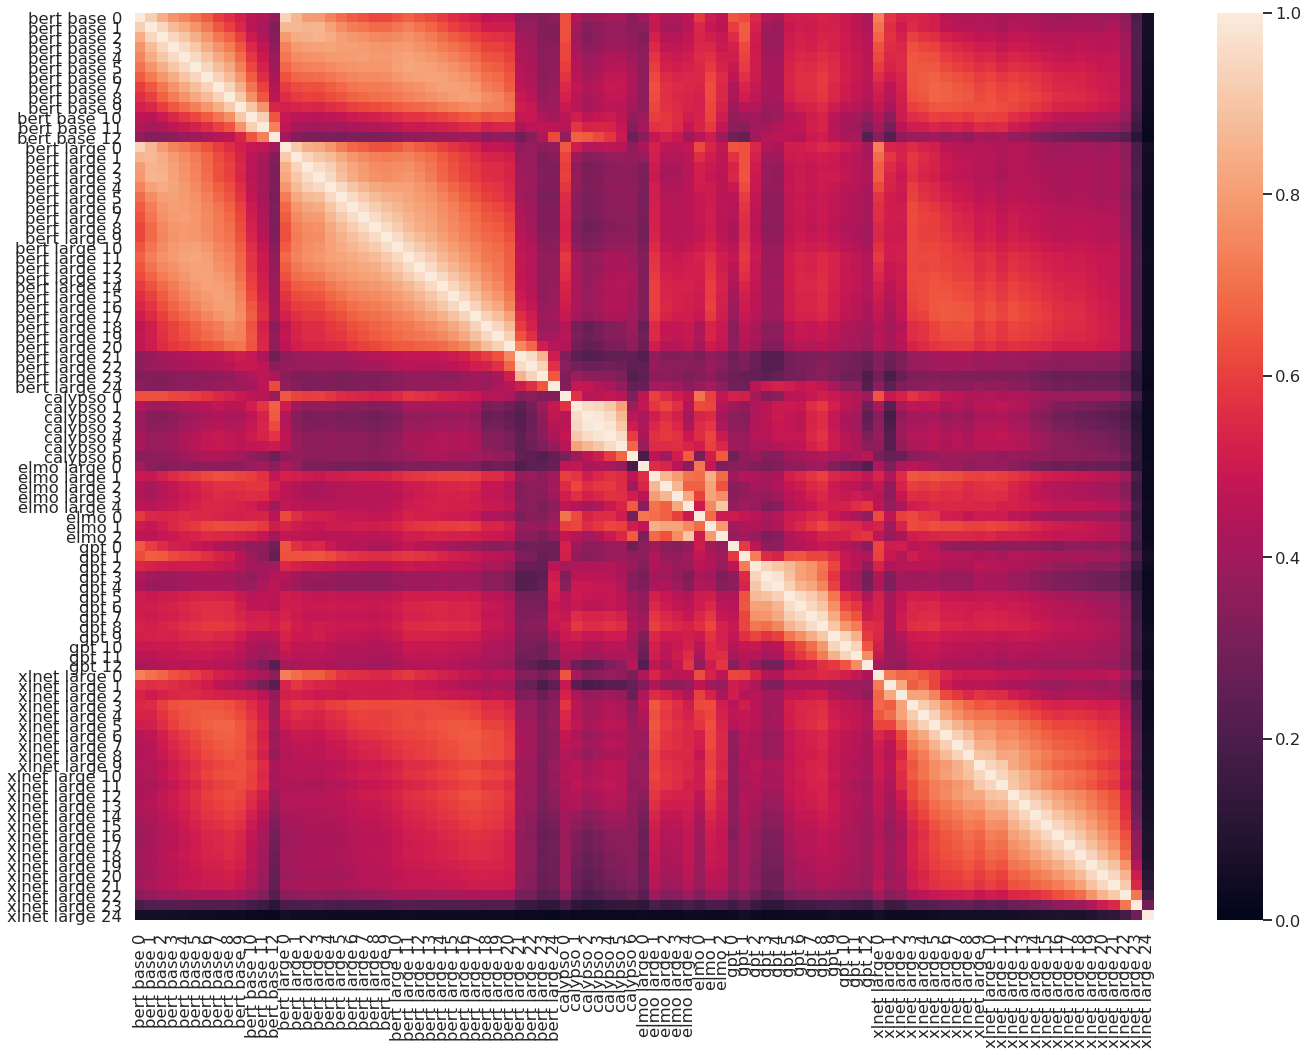

In [99]:
# lincka
fname_prefix = "temp_lincka8_1.00"
fname = "{0}.png".format(fname_prefix)
sns.heatmap(lincka_df.fillna(1), vmin=0, vmax=1, xticklabels=short_labels, yticklabels=short_labels)
plt.tight_layout()
plt.savefig(fname) #, transparent=True)

In [100]:
def corrs_update(fl, corr_df, fname_prefix, weights_df=None):
    fname = "{0}{1:.2f}.png".format(fname_prefix, fl)
    try:
        im = plt.imread(fname)
        plt.imshow(im)
    except:
        if weights_df is None: # eg. svcca, don't need to do special division
            df = corr_df.applymap(lambda t: float('nan') if type(t) is float else 
                                              t[:int(fl*len(t))].mean())
        else:
            denominator_df = weights_df.applymap(lambda t: float('nan') if type(t) is float else 
                                                             t[:int(fl*len(t))].sum())
            df = corr_df.applymap(lambda t: float('nan') if type(t) is float else
                                            t[:int(fl*len(t))].sum())
            df /= denominator_df
        sns.heatmap(df.fillna(1), vmin=0, vmax=1, xticklabels=short_labels, yticklabels=short_labels)
        # sns.heatmap(df.fillna(1), )
        plt.tight_layout()
        plt.savefig(fname) #, transparent=True)
        plt.show()

In [101]:
# interactive updates
def pw_update(fl):
    corrs_update(fl, pw_corrs_df, "temp_pw8_", weights_df=pw_alignments_df)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(pw_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [88]:
# interactive updates
def sv_update(fl):
    corrs_update(fl, sv_corrs_df, "temp_sv8_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(sv_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [89]:
# interactive for maxmincorr
maxmin_corrs = res_d['maxcorr']['corrs']
maxmin_corrs_df = pd.DataFrame(maxmin_corrs).applymap(lambda a: float('nan') if type(a) is float else -np.sort(-a)) # np sort has no reverse keyword
maxmin_corrs_df = maxmin_corrs_df.reindex(maxmin_corrs_df.columns)
def maxmincorr_update(fl):
    corrs_update(fl, maxmin_corrs_df, "temp_maxmincorr8_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(maxmincorr_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [90]:
# interactive for linregcorr
linreg_corrs = res_d['maxlinreg']['pred_power']
linreg_corrs_df = pd.DataFrame(linreg_corrs).applymap(lambda a: float('nan') if type(a) is float else -np.sort(-a)) # np sort has no reverse keyword
linreg_corrs_df = linreg_corrs_df.reindex(linreg_corrs_df.columns)
def linregcorr_update(fl):
    corrs_update(fl, linreg_corrs_df, "temp_linregcorr8_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(linregcorr_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [91]:
# rbfcka
# sns.heatmap(rbfcka_df.reindex(rbfcka_df.columns).fillna(1), vmin=0, vmax=1)

In [74]:
# comparing models
# use lincka
model1 = "elmo"
model2 = "elmo"
cols = [s for s in lincka_df.columns if s.find(model1) >= 0]
rows = [s for s in lincka_df.columns if s.find(model2) >= 0]

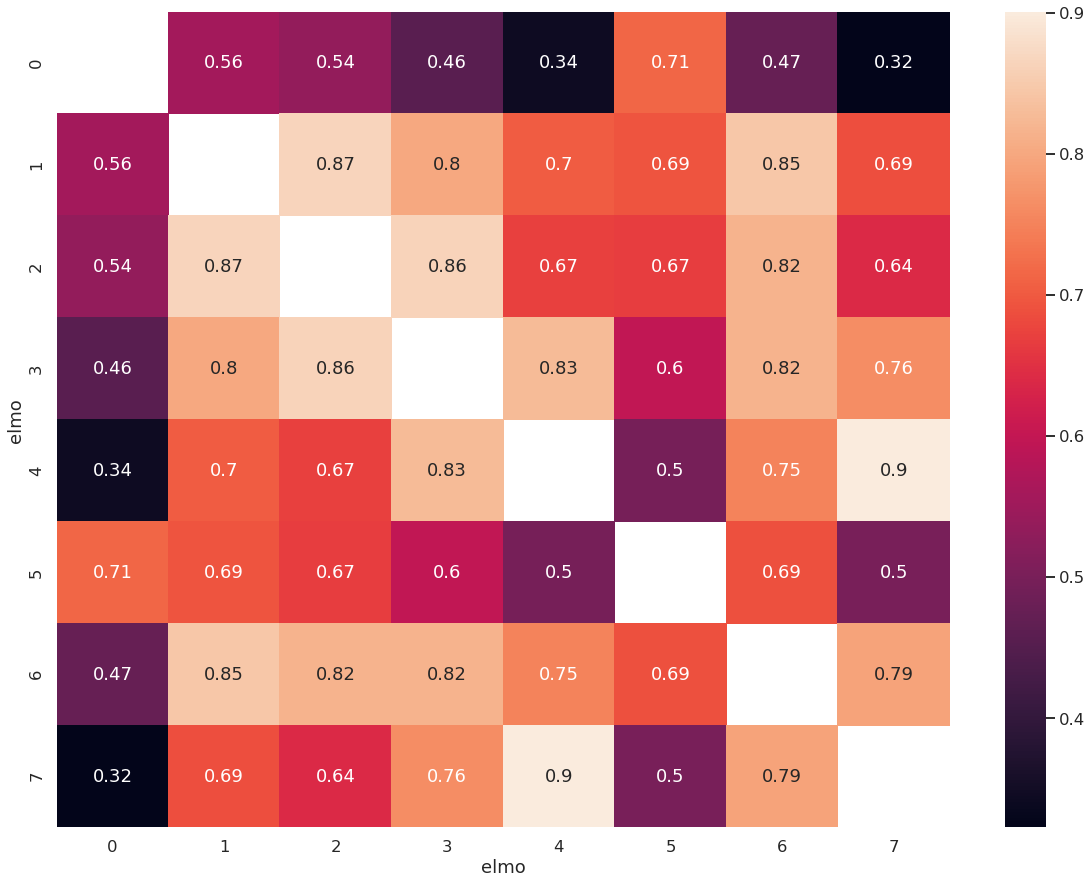

In [75]:
df = lincka_df.loc[rows, cols]

sns.heatmap(df, xticklabels=range(len(df.columns)), yticklabels=range(len(df.index)), annot=True)
plt.xlabel(model1)
plt.ylabel(model2)
plt.show()

# Localized vs distributed

In [102]:
locl_meth = "maxcorr"
dist_meth = "cca"

# Localized and distributed dataframes
locl_df = pd.DataFrame(res_d[locl_meth]['similarities'])
locl_df = locl_df.reindex(locl_df.columns)

dist_df = pd.DataFrame(res_d[dist_meth]['sv_similarities'])
dist_df = dist_df.reindex(dist_df.columns)

# Localization and distributivity statistics
locl_ser = locl_df.mean(axis=1)
locl_ser = (locl_ser - locl_ser.mean()) / locl_ser.std()

dist_ser = dist_df.mean(axis=1)
dist_ser = (dist_ser - dist_ser.mean()) / dist_ser.std()

# diff_ser
diff_ser = locl_ser - dist_ser

['bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'bert large', 'gpt', 'gpt', 'gpt', 'gpt', 'gpt', 'gpt', 'gpt', 'gpt', 'gpt', 'gpt', 'gpt', 'gpt', 'gpt', 'bert base', 'bert base', 'bert base', 'bert base', 'bert base', 'bert base', 'bert base', 'bert base', 'bert base', 'bert base', 'bert base', 'bert base', 'bert base', 'elmo', 'elmo', 'elmo', 'calypso', 'calypso', 'calypso', 'calypso', 'calypso', 'calypso', 'calypso', 'elmo large', 'elmo large', 'elmo large', 'elmo large', 'elmo large', 'xlnet large', 'xlnet large', 'xlnet large', 'xlnet large', 'xlnet large', 'xlnet large', 'xlnet large', 'xlnet large', 'xlnet large', 'xlnet large', 'xlnet large', 'xlnet large', 'xlnet large', 'xlnet large', 'xlnet l

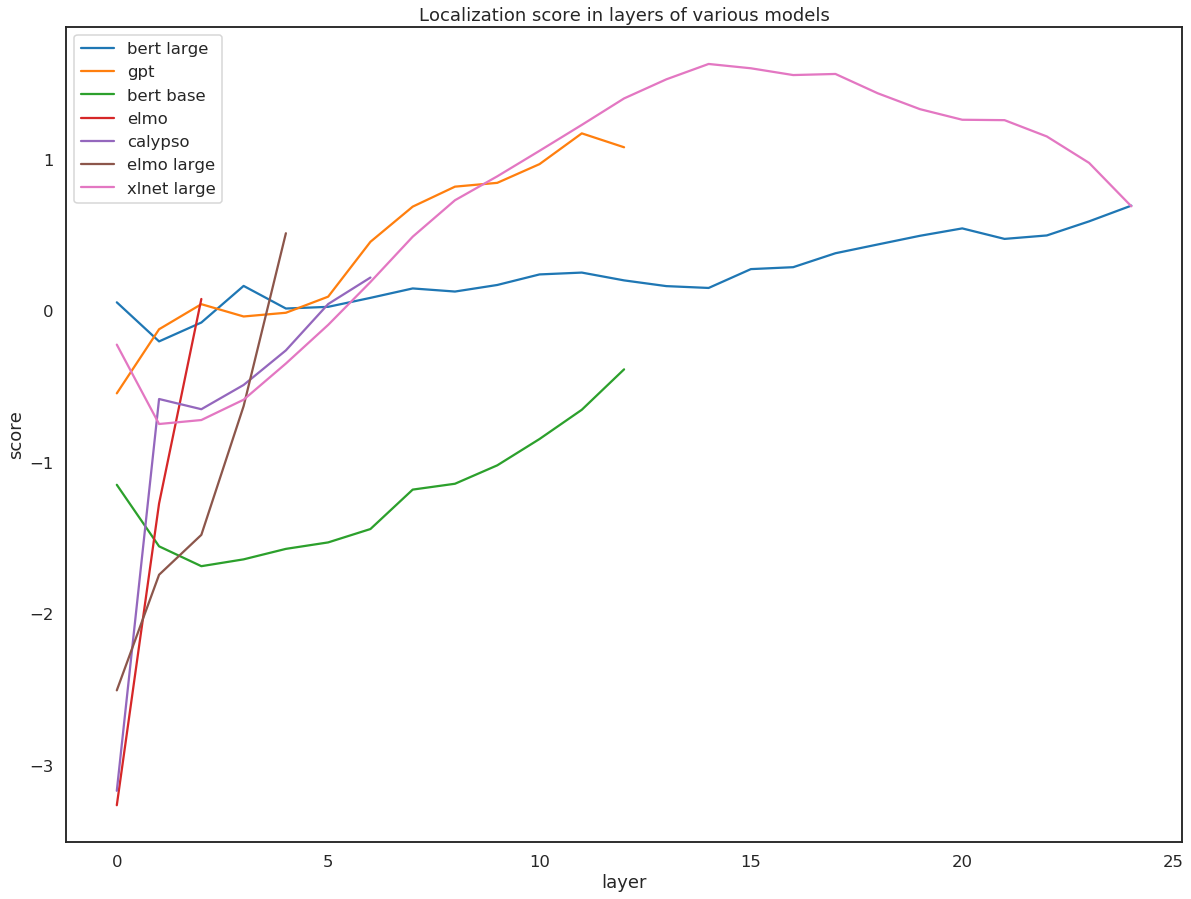

In [108]:
diff_df = pd.DataFrame(diff_ser, columns=['score'])
x = [network_sort_key(layer) for layer in diff_df.index.values]
models, layers = list(zip(*x))
models = [model2short[model] for model in models]
print(models)
# print(layers)
diff_df['layer'] = layers
diff_df['model'] = models
# diff_df.head()
g = sns.lineplot(data=diff_df, x='layer', y='score', hue='model')
handles, labels = g.get_legend_handles_labels()
# labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
g.legend(handles=handles[1:], labels=labels[1:])
g.set_title('Localization score in layers of various models')
g.get_figure().savefig('all-loc-score.pdf')

In [78]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): # print everything
    print(diff_ser.sort_values())

elmo_original-ptb_pos_dev.hdf5_0                           -3.261489
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_0          -3.166285
elmo_4x4096_512-ptb_pos_dev.hdf5_0                         -2.503358
elmo_4x4096_512-ptb_pos_dev.hdf5_1                         -1.740609
bert_base_cased-ptb_pos_dev.hdf5_2                         -1.684041
bert_base_cased-ptb_pos_dev.hdf5_3                         -1.638985
bert_base_cased-ptb_pos_dev.hdf5_4                         -1.569860
bert_base_cased-ptb_pos_dev.hdf5_1                         -1.553117
bert_base_cased-ptb_pos_dev.hdf5_5                         -1.527142
elmo_4x4096_512-ptb_pos_dev.hdf5_2                         -1.477290
bert_base_cased-ptb_pos_dev.hdf5_6                         -1.438886
elmo_original-ptb_pos_dev.hdf5_1                           -1.270369
bert_base_cased-ptb_pos_dev.hdf5_7                         -1.178698
bert_base_cased-ptb_pos_dev.hdf5_0                         -1.147027
bert_base_cased-ptb_pos_dev.hdf5_8

In [79]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): # print everything
    print(locl_ser.sort_values())

elmo_original-ptb_pos_dev.hdf5_0                           -2.774173
elmo_4x4096_512-ptb_pos_dev.hdf5_2                         -2.479347
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24   -2.387685
elmo_4x4096_512-ptb_pos_dev.hdf5_0                         -2.305946
elmo_4x4096_512-ptb_pos_dev.hdf5_3                         -2.225689
elmo_4x4096_512-ptb_pos_dev.hdf5_1                         -2.165911
elmo_original-ptb_pos_dev.hdf5_2                           -2.059550
elmo_original-ptb_pos_dev.hdf5_1                           -1.991297
elmo_4x4096_512-ptb_pos_dev.hdf5_4                         -1.862020
openai_transformer-ptb_pos_dev.hdf5_0                      -1.551385
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_0          -1.399314
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_6          -1.220294
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23   -1.028807
openai_transformer-ptb_pos_dev.hdf5_12                     -1.003151
bert_large_cased-ptb_pos_dev.hdf5_

In [80]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): # print everything
    print(dist_ser.sort_values())

xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_24   -3.078343
elmo_4x4096_512-ptb_pos_dev.hdf5_4                         -2.374976
elmo_original-ptb_pos_dev.hdf5_2                           -2.138725
openai_transformer-ptb_pos_dev.hdf5_12                     -2.083333
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_23   -2.005953
bert_large_cased-ptb_pos_dev.hdf5_24                       -1.650284
elmo_4x4096_512-ptb_pos_dev.hdf5_3                         -1.597784
calypso_transformer_6_512_base-ptb_pos_dev.hdf5_6          -1.440840
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_22   -1.430081
openai_transformer-ptb_pos_dev.hdf5_11                     -1.372944
xlnet_large_cased-ptb_pos_dev_include_embeddings.hdf5_21   -1.138135
bert_large_cased-ptb_pos_dev.hdf5_23                       -1.116413
openai_transformer-ptb_pos_dev.hdf5_0                      -1.007856
elmo_4x4096_512-ptb_pos_dev.hdf5_2                         -1.002057
xlnet_large_cased-ptb_pos_dev_incl